# Iris Classification - ML

## Objective
- To develope a model that can find the species of flowe using petal length and width, sepal length and width

## Steps
- Import Libraries
- Data Preprocessing
- Feature Encoding
- Feature Selection
- Model Training

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Read the train data

In [2]:
data=pd.read_csv('files/train/raw/train.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,115,5.8,2.8,5.1,2.4,Iris-virginica
1,137,6.3,3.4,5.6,2.4,Iris-virginica
2,54,5.5,2.3,4.0,1.3,Iris-versicolor
3,20,5.1,3.8,1.5,0.3,Iris-setosa
4,39,4.4,3.0,1.3,0.2,Iris-setosa
...,...,...,...,...,...,...
100,18,5.1,3.5,1.4,0.3,Iris-setosa
101,99,5.1,2.5,3.0,1.1,Iris-versicolor
102,67,5.6,3.0,4.5,1.5,Iris-versicolor
103,127,6.2,2.8,4.8,1.8,Iris-virginica


## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             105 non-null    int64  
 1   SepalLengthCm  105 non-null    float64
 2   SepalWidthCm   105 non-null    float64
 3   PetalLengthCm  105 non-null    float64
 4   PetalWidthCm   105 non-null    float64
 5   Species        105 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ KB


In [5]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,115,5.8,2.8,5.1,2.4,Iris-virginica
1,137,6.3,3.4,5.6,2.4,Iris-virginica
2,54,5.5,2.3,4.0,1.3,Iris-versicolor
3,20,5.1,3.8,1.5,0.3,Iris-setosa
4,39,4.4,3.0,1.3,0.2,Iris-setosa
5,111,6.5,3.2,5.1,2.0,Iris-virginica
6,24,5.1,3.3,1.7,0.5,Iris-setosa
7,10,4.9,3.1,1.5,0.1,Iris-setosa
8,87,6.7,3.1,4.7,1.5,Iris-versicolor
9,92,6.1,3.0,4.6,1.4,Iris-versicolor


In [6]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,97,5.7,2.9,4.2,1.3,Iris-versicolor
96,58,4.9,2.4,3.3,1.0,Iris-versicolor
97,124,6.3,2.7,4.9,1.8,Iris-virginica
98,107,4.9,2.5,4.5,1.7,Iris-virginica
99,84,6.0,2.7,5.1,1.6,Iris-versicolor
100,18,5.1,3.5,1.4,0.3,Iris-setosa
101,99,5.1,2.5,3.0,1.1,Iris-versicolor
102,67,5.6,3.0,4.5,1.5,Iris-versicolor
103,127,6.2,2.8,4.8,1.8,Iris-virginica
104,110,7.2,3.6,6.1,2.5,Iris-virginica


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

Id               105
SepalLengthCm     32
SepalWidthCm      20
PetalLengthCm     41
PetalWidthCm      21
Species            3
dtype: int64

## Finding Outlier

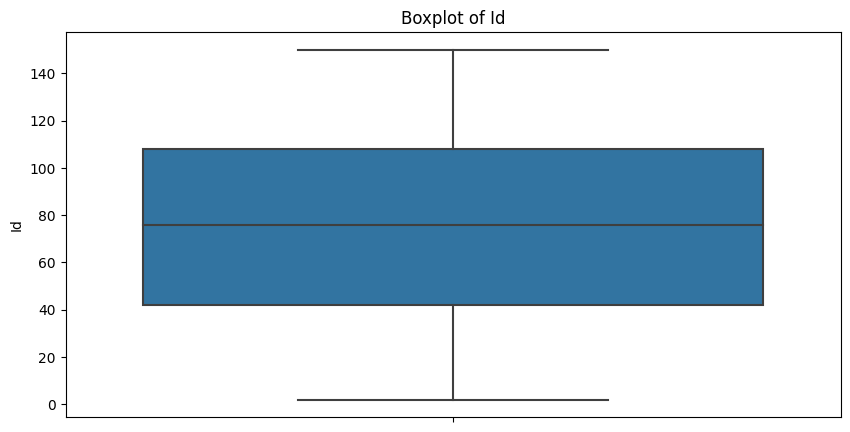

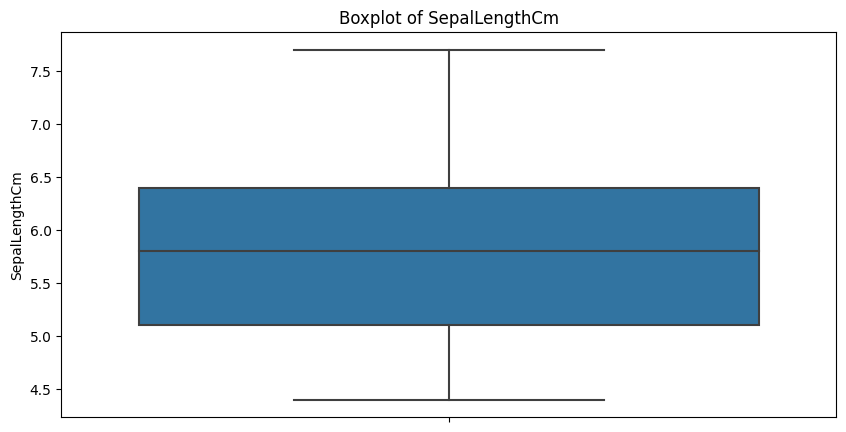

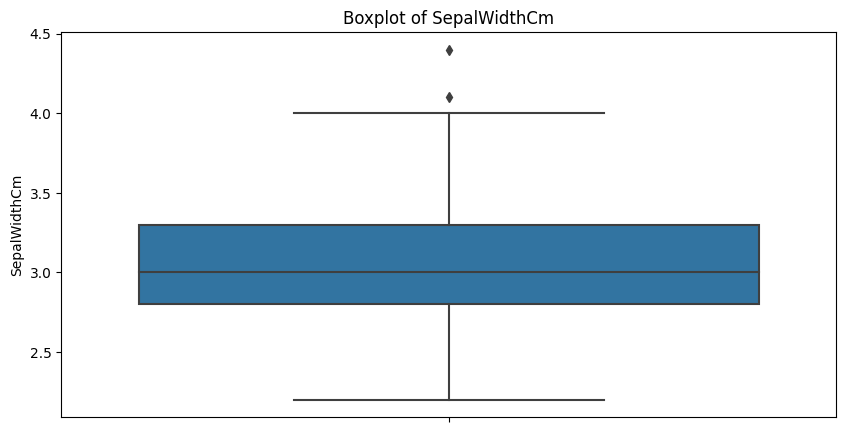

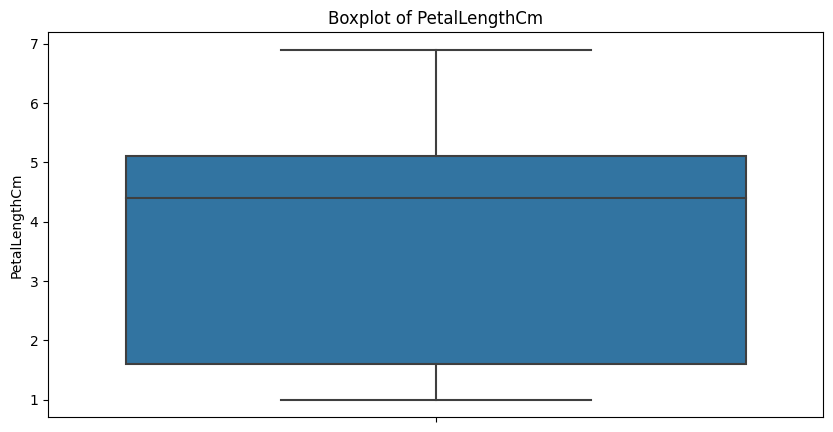

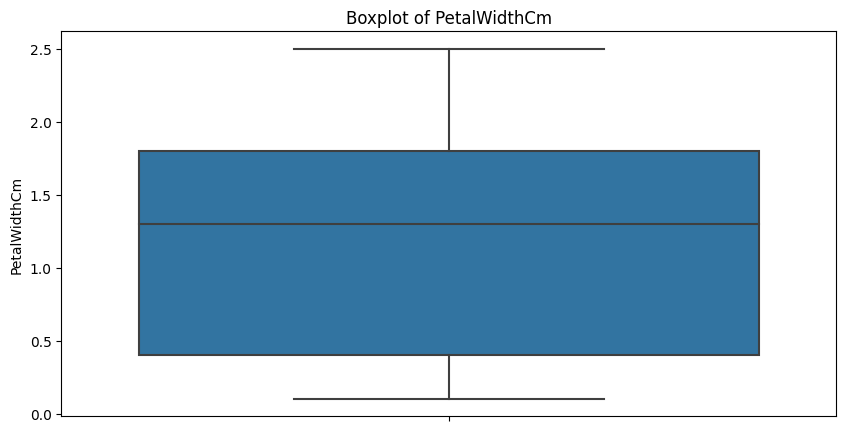

In [11]:
for column in data.columns:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'Boxplot of {column}')
        plt.show()

## Handling Outlier

In [12]:
for column in ['SepalWidthCm']:
    if data[column].dtype!='object':
        q1=data[column].quantile(0.25)
        q3=data[column].quantile(0.75)
        IQR=q3-q1
        lower=q1-(IQR*1.5)
        upper=q3+(IQR*1.5)
        data[column]=np.where(data[column]<lower,lower,
                     np.where(data[column]>upper,upper,
                     data[column]))   

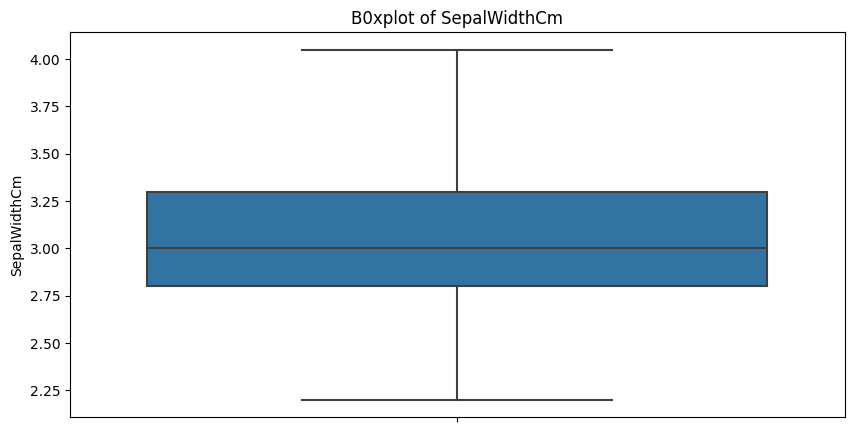

In [13]:
for column in ['SepalWidthCm']:
    if data[column].dtype!='object':
        plt.figure(figsize=(10,5))
        sns.boxplot(y=column,data=data)
        plt.ylabel(column)
        plt.title(f'B0xplot of {column}')
        plt.show()    

In [14]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,75.104762,5.869524,3.046667,3.837143,1.231429
std,41.594176,0.796039,0.398028,1.714265,0.740623
min,2.000000,4.400000,2.200000,1.000000,0.100000
25%,42.000000,5.100000,2.800000,1.600000,0.400000
50%,76.000000,5.800000,3.000000,4.400000,1.300000
75%,108.000000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.700000,4.050000,6.900000,2.500000


## Feature Engineering

In [15]:
df=data.copy()
y=df['Species'].copy()
x=df.drop(['Species'],axis=1).copy()

## Splitting Datas

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=123)

In [17]:
x_train.to_csv('files/train/raw/x_train.csv',index=False)
y_train.to_csv('files/train/raw/y_train.csv',index=False)

x_test.to_csv('files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('files/evaluate/raw/y_test.csv',index=False)

## Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [19]:
#minmax scaler
#fit
min_scaler=MinMaxScaler()
min_scaled_data=min_scaler.fit(x_train)
import joblib as jb
jb.dump(min_scaled_data,'files/train/model/train_min_scaled_model.pkl')
#transform
min_scaled_data=min_scaler.transform(x_train)
x_train_min_max=pd.DataFrame(min_scaled_data,columns=x_train.columns)

In [20]:
x_train_min_max

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.493243,0.59375,0.342857,0.578947,0.500000
1,0.837838,0.84375,0.514286,0.877193,0.708333
2,0.283784,0.15625,0.685714,0.105263,0.208333
3,0.702703,0.96875,0.400000,0.982456,0.833333
4,0.567568,0.46875,0.628571,0.614035,0.625000
...,...,...,...,...,...
68,0.364865,0.37500,0.285714,0.614035,0.500000
69,0.635135,0.37500,0.400000,0.561404,0.458333
70,0.709459,0.12500,0.114286,0.614035,0.666667
71,0.310811,0.03125,0.514286,0.070175,0.041667


In [21]:
x_train_min_max.to_csv('files/train/processed/x_train_min_max_processed.csv',index=False)

In [22]:
#standard scaler
#fit
std=StandardScaler()
std_scaled_data=std.fit(x_train_min_max)
jb.dump(std_scaled_data,'files/train/model/train_std_model.pkl')
std_scaled_data=std.transform(x_train_min_max)
x_train_std=pd.DataFrame(std_scaled_data,columns=x_train_min_max.columns)

In [23]:
x_train_std

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.084755,0.696090,-0.327454,0.231121,0.019025
1,1.115022,1.751977,0.415680,1.251837,0.713441
2,-0.814030,-1.151712,1.158813,-1.390016,-0.953157
3,0.644521,2.279920,-0.079743,1.612090,1.130091
4,0.174021,0.168146,0.911102,0.351205,0.435675
...,...,...,...,...,...
68,-0.531730,-0.227811,-0.575165,0.351205,0.019025
69,0.409271,-0.227811,-0.079743,0.171079,-0.119858
70,0.668046,-1.283698,-1.318298,0.351205,0.574558
71,-0.719930,-1.679656,0.415680,-1.510100,-1.508690


In [24]:
x_train_std.to_csv('files/train/processed/x_train_std_processed.csv',index=False)

In [25]:
#label encoding y train
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_encode=encoder.fit(y_train)
jb.dump(y_encode,'files/train/model/train_encode_model.pkl')
y_encode=encoder.transform(y_train)
y_train_encode=pd.DataFrame(y_encode,columns=['Species'])

In [26]:
y_train_encode

,Species
0,1
1,2
2,0
3,2
4,1
...,...
68,1
69,1
70,2
71,0


In [27]:
y_train_encode.to_csv('files/train/processed/y_train_processed.csv',index=False)

<Axes: >

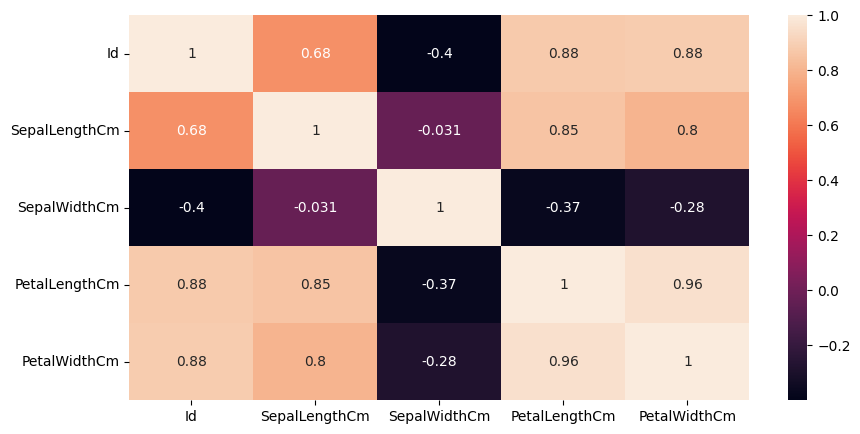

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(x_train_std.corr(),annot=True)

In [29]:
#Scaling test datas
#minmax scaler
#fit
min_scaler=MinMaxScaler()
min_scaled_data=min_scaler.fit(x_test)
jb.dump(min_scaled_data,'files/evaluate/model/test_min_scaled_model.pkl')
#transform
min_scaled_data=min_scaler.transform(x_test)
x_test_min_max=pd.DataFrame(min_scaled_data,columns=x_test.columns)

In [30]:
x_test_min_max

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.366197,0.666667,0.378378,0.589286,0.521739
1,0.042254,0.121212,0.432432,0.017857,0.000000
2,0.147887,0.242424,0.702703,0.035714,0.043478
3,0.542254,0.484848,0.270270,0.678571,0.652174
4,1.000000,0.545455,0.648649,0.732143,0.956522
5,0.183099,0.242424,1.000000,0.035714,0.000000
6,0.563380,0.696970,0.486486,0.607143,0.608696
7,0.732394,0.636364,0.540541,0.678571,0.826087
8,0.760563,0.424242,0.324324,0.678571,1.000000
9,0.197183,0.151515,0.486486,0.035714,0.000000


In [31]:
x_test_min_max.to_csv('files/evaluate/processed/x_test_min_max_processed.csv',index=False)

In [32]:
#standard scaler
#fit
std=StandardScaler()
std_scaled_data=std.fit(x_test_min_max)
jb.dump(std_scaled_data,'files/evaluate/model/test_std_model.pkl')
std_scaled_data=std.transform(x_test_min_max)
x_test_std=pd.DataFrame(std_scaled_data,columns=x_test_min_max.columns)

In [33]:
x_test_std

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.216447,0.851680,-0.477614,0.527691,0.254965
1,-1.441868,-1.226997,-0.211812,-1.267510,-1.324173
2,-1.042274,-0.765069,1.117203,-1.211410,-1.192578
3,0.449543,0.158788,-1.009220,0.808191,0.649749
4,2.181117,0.389752,0.851400,0.976491,1.570913
5,-0.909076,-0.765069,2.579118,-1.211410,-1.324173
6,0.529462,0.967162,0.053991,0.583791,0.518154
7,1.168812,0.736198,0.319794,0.808191,1.176128
8,1.275371,-0.072176,-0.743417,0.808191,1.702508
9,-0.855797,-1.111515,0.053991,-1.211410,-1.324173


In [34]:
x_test_std.to_csv('files/evaluate/processed/x_test_std_processed.csv',index=False)

In [35]:
#label encoding y test
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_encode=encoder.fit(y_test)
jb.dump(y_encode,'files/evaluate/model/test_encode_model.pkl')
y_encode=encoder.transform(y_test)
y_test_encode=pd.DataFrame(y_encode,columns=['Species'])

In [36]:
y_test_encode

,Species
0,1
1,0
2,0
3,1
4,2
5,0
6,1
7,2
8,2
9,0


In [37]:
y_test_encode.to_csv('files/evaluate/processed/y_test_processed.csv',index=False)

## Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest,f_regression
bestfeatures=SelectKBest(score_func=f_regression,k=5)
fit=bestfeatures.fit(x_train_std,y_train_encode)

In [39]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['specs','scores']
print(featurescores.nlargest(10,'scores'))

           specs      scores
4   PetalWidthCm  642.803418
3  PetalLengthCm  617.481777
0             Id  475.653753
1  SepalLengthCm   95.390253
2   SepalWidthCm   13.303901


In [40]:
feature=featurescores.nlargest(10,'scores')
feature

,specs,scores
4,PetalWidthCm,642.803418
3,PetalLengthCm,617.481777
0,Id,475.653753
1,SepalLengthCm,95.390253
2,SepalWidthCm,13.303901


In [41]:
feature_list=feature['specs'].to_list()
feature_list

['PetalWidthCm', 'PetalLengthCm', 'Id', 'SepalLengthCm', 'SepalWidthCm']

In [42]:
jb.dump(feature_list,'files/train/model/feature_selected_model.pkl')

['files/train/model/feature_selected_model.pkl']

In [43]:
feature_selected=x_train_std[feature_list]
feature_selected

,PetalWidthCm,PetalLengthCm,Id,SepalLengthCm,SepalWidthCm
0,0.019025,0.231121,-0.084755,0.696090,-0.327454
1,0.713441,1.251837,1.115022,1.751977,0.415680
2,-0.953157,-1.390016,-0.814030,-1.151712,1.158813
3,1.130091,1.612090,0.644521,2.279920,-0.079743
4,0.435675,0.351205,0.174021,0.168146,0.911102
...,...,...,...,...,...
68,0.019025,0.351205,-0.531730,-0.227811,-0.575165
69,-0.119858,0.171079,0.409271,-0.227811,-0.079743
70,0.574558,0.351205,0.668046,-1.283698,-1.318298
71,-1.508690,-1.510100,-0.719930,-1.679656,0.415680


In [44]:
feature_selected.to_csv('files/train/processed/x_train_feature_selected.csv')

## Model Training

In [45]:
from sklearn.svm import SVC

In [46]:
svc=SVC()
svc.fit(feature_selected,y_train_encode)
print('Train Score : ',svc.score(feature_selected,y_train_encode)*100)

Train Score :  100.0


In [47]:
jb.dump(svc,'files/train/model/svc.pkl')

['files/train/model/svc.pkl']

## Prediction

## Load X Test And Y Test

In [48]:
feature_selection=jb.load('files/train/model/feature_selected_model.pkl')
model=jb.load('files/train/model/svc.pkl')

In [49]:
feature_selection

['PetalWidthCm', 'PetalLengthCm', 'Id', 'SepalLengthCm', 'SepalWidthCm']

In [50]:
model

SVC()

In [51]:
feature_selected=x_test_std[feature_selection]
feature_selected

,PetalWidthCm,PetalLengthCm,Id,SepalLengthCm,SepalWidthCm
0,0.254965,0.527691,-0.216447,0.851680,-0.477614
1,-1.324173,-1.267510,-1.441868,-1.226997,-0.211812
2,-1.192578,-1.211410,-1.042274,-0.765069,1.117203
3,0.649749,0.808191,0.449543,0.158788,-1.009220
4,1.570913,0.976491,2.181117,0.389752,0.851400
5,-1.324173,-1.211410,-0.909076,-0.765069,2.579118
6,0.518154,0.583791,0.529462,0.967162,0.053991
7,1.176128,0.808191,1.168812,0.736198,0.319794
8,1.702508,0.808191,1.275371,-0.072176,-0.743417
9,-1.324173,-1.211410,-0.855797,-1.111515,0.053991


In [52]:
y_pred=pd.DataFrame(model.predict(feature_selected))
y_pred

,0
0,1
1,0
2,0
3,2
4,2
5,0
6,1
7,2
8,2
9,0


## Evaluation Of Model

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [54]:
print(classification_report(y_pred,y_test_encode))
cm=confusion_matrix(y_pred,y_test_encode)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      1.00      0.92        11
           2       1.00      0.78      0.88         9

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.93        32
weighted avg       0.95      0.94      0.94        32



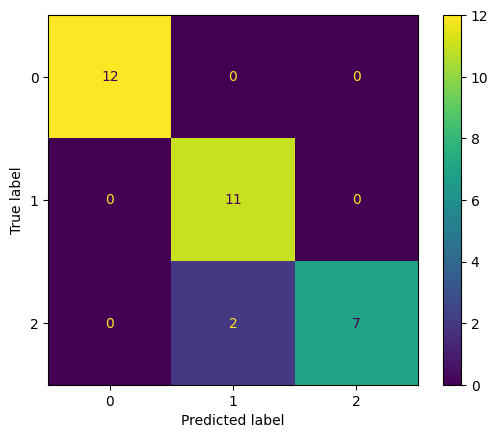

In [55]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()